In [1743]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

Problem 1:
You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Data Ingestion: 11 marks 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks) 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

Data Preparation: 4 marks 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

Modeling: 22 marks 1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks) 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks) 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks) 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

Inference: 5 marks 1.8 Based on these predictions, what are the insights? (5 marks)

In [1744]:
# from google.colab import drive
# drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/great learning/Machine Learning/project /Election_Data.xlsx')

In [1745]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [1746]:
df.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [1747]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


## Check for Null Values

In [1748]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

## Check for duplicates 

In [1749]:

df.duplicated().sum()

0

In [1750]:
df.rename(columns={'Unnamed: 0' : 'Index'},inplace=True)

In [1751]:
df.head()

,Index,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


## Univariate Analysis

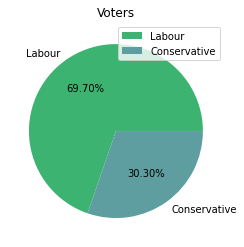

In [1752]:
voters_index = df['vote'].value_counts().index
voters_values = df['vote'].value_counts().values

plt.pie(voters_values,labels = voters_index,autopct = "%1.2f%%",colors=['mediumseagreen','cadetblue','dodgerblue']);
plt.title('Voters');
plt.legend()

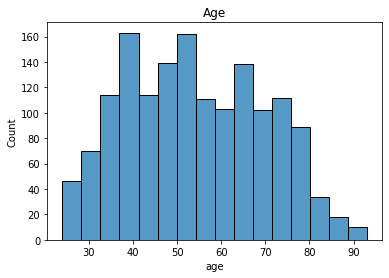

In [1753]:
sns.histplot(x=df['age'])
plt.title('Age');

In [1754]:
df['age'].max()

93

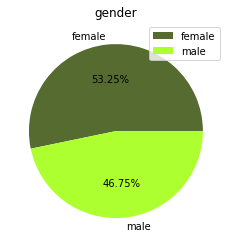

In [1755]:
gender_index = df['gender'].value_counts().index
gender_value = df['gender'].value_counts().values

plt.pie(gender_value,labels = gender_index,autopct = "%1.2f%%",colors=['darkolivegreen','greenyellow']);
plt.title('gender');
plt.legend()
plt.show()

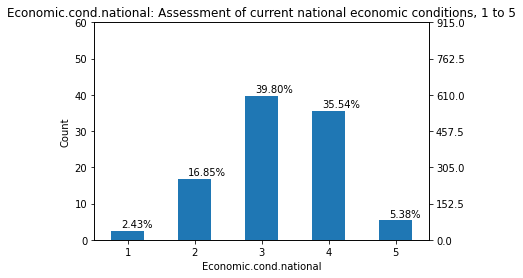

In [1756]:
plt.ylabel('Count')
plt.xlabel('Economic.cond.national')
plt.title('Economic.cond.national: Assessment of current national economic conditions, 1 to 5')

ax = (df['economic.cond.national'].value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 70, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 70, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))



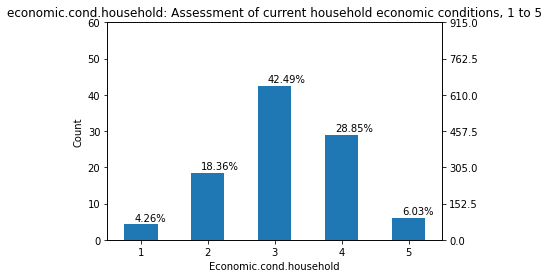

In [1757]:
plt.ylabel('Count')
plt.xlabel('Economic.cond.household')
plt.title('economic.cond.household: Assessment of current household economic conditions, 1 to 5')

ax = (df['economic.cond.household'].value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 70, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 70, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))



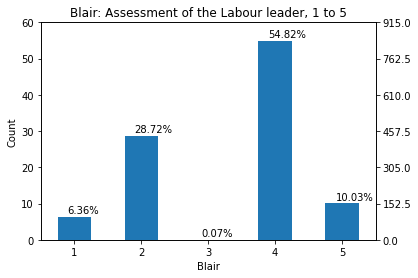

In [1758]:
plt.ylabel('Count')
plt.xlabel('Blair')
plt.title('Blair: Assessment of the Labour leader, 1 to 5')

ax = (df['Blair'].value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 70, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 70, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

# sns.countplot(x=df['Blair'])

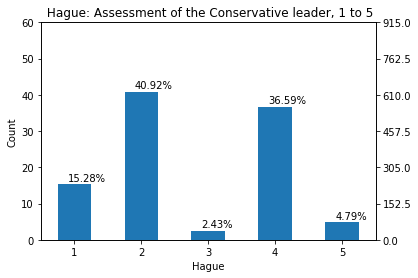

In [1759]:
plt.ylabel('Count')
plt.xlabel('Hague')
plt.title(' Hague: Assessment of the Conservative leader, 1 to 5')

ax = (df.Hague.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 70, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 70, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))



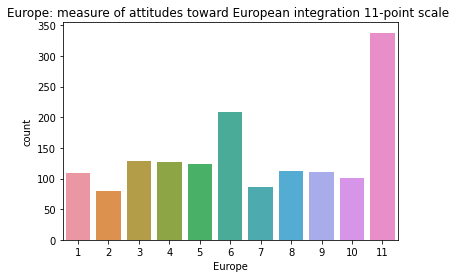

In [1760]:
sns.countplot(x=df['Europe'])
plt.title('Europe: measure of attitudes toward European integration 11-point scale ')
plt.show()

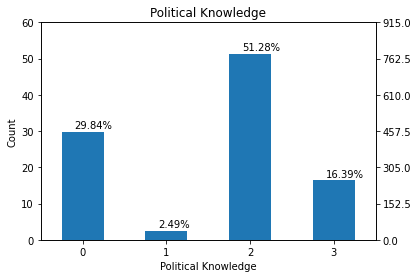

In [1761]:
plt.ylabel('Count')
plt.xlabel('Political Knowledge')
plt.title('Political Knowledge')

ax = (df['political.knowledge'].value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 70, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 70, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))


# Bi-Variante Analysis

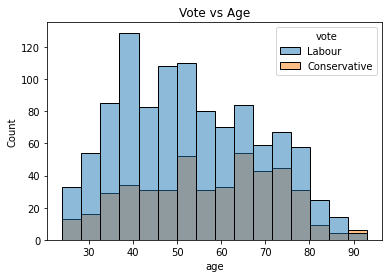

In [1762]:
plt.title('Vote vs Age')
sns.histplot(hue=df['vote'],x=df['age'])

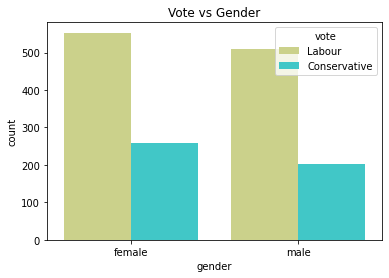

In [1763]:
plt.title('Vote vs Gender')
sns.countplot(x=df['gender'],hue=df['vote'],palette='rainbow_r')


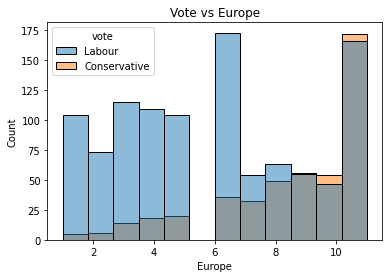

In [1764]:
plt.title('Vote vs Europe')
sns.histplot(hue=df['vote'],x=df['Europe'])

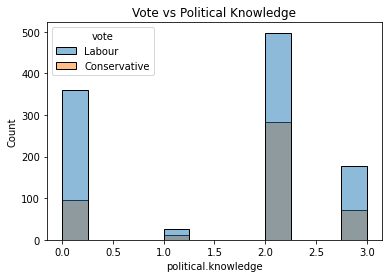

In [1765]:
plt.title('Vote vs Political Knowledge')
sns.histplot(hue=df['vote'],x=df['political.knowledge'])

In [1766]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Index                    1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


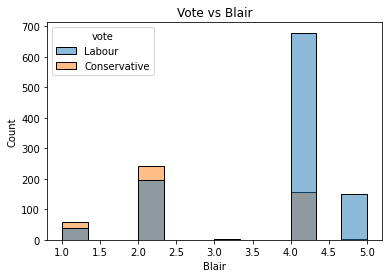

In [1767]:
plt.title('Vote vs Blair')
sns.histplot(hue=df['vote'],x=df['Blair'])

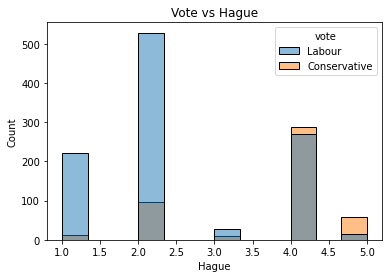

In [1768]:
plt.title('Vote vs Hague')
sns.histplot(hue=df['vote'],x=df['Hague'])

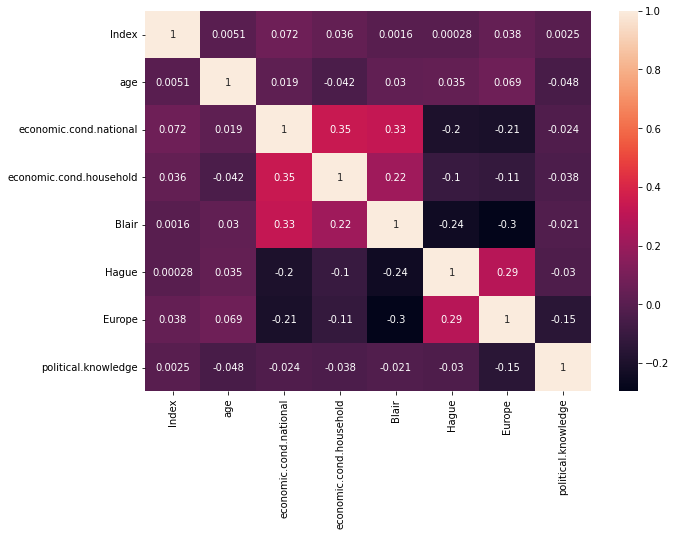

In [1769]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

## Outliers Treatment

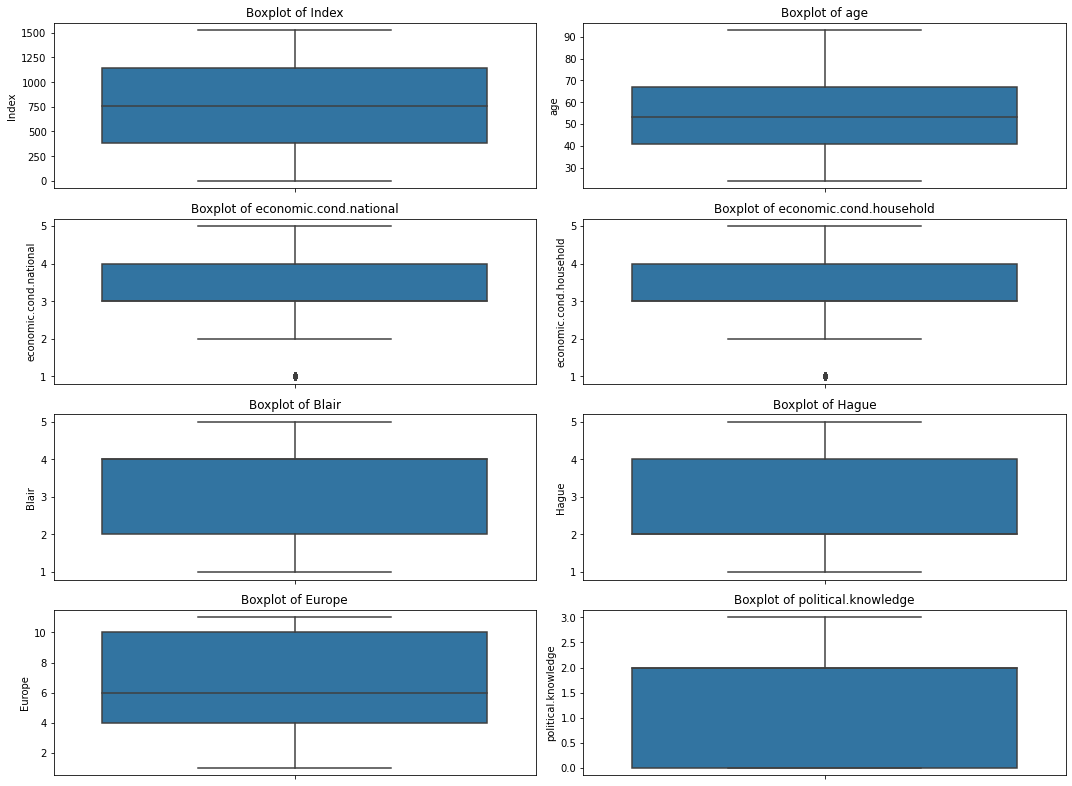

In [1770]:
categorical_df = df.select_dtypes(exclude = 'object')
categorical_df
plt.figure(figsize=(15,30))
for i in range(len(categorical_df.columns)):
    plt.subplot(11,2,i+1)
    sns.boxplot(y=categorical_df[categorical_df.columns[i]]);
    plt.title('Boxplot of {}'.format(categorical_df.columns[i]))
    plt.tight_layout();

In [1771]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [1772]:

lr,ur=remove_outlier(df['economic.cond.national'])
df['economic.cond.national']=np.where(df['economic.cond.national']>ur,ur,df['economic.cond.national'])
df['economic.cond.national']=np.where(df['economic.cond.national']<lr,lr,df['economic.cond.national'])


lr,ur=remove_outlier(df['economic.cond.household'])
df['economic.cond.household']=np.where(df['economic.cond.household']>ur,ur,df['economic.cond.household'])
df['economic.cond.household']=np.where(df['economic.cond.household']<lr,lr,df['economic.cond.household'])

Text(0.5, 1.0, 'economic.cond.national')

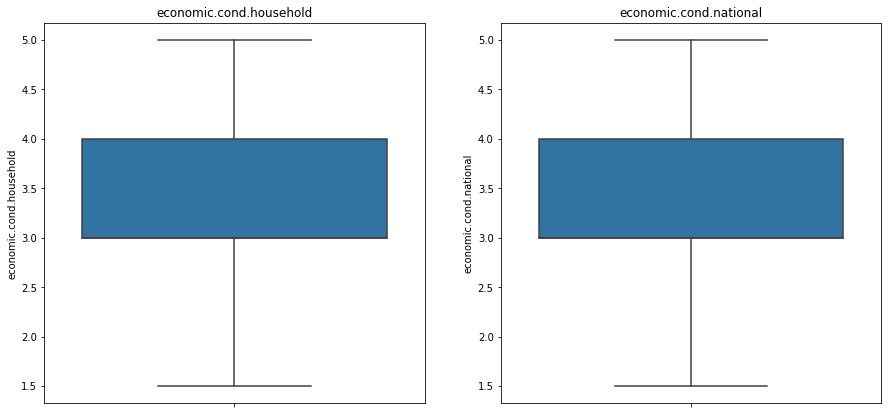

In [1773]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15,7))

sns.boxplot(y=df['economic.cond.household'],ax=axs[0])
sns.boxplot(y=df['economic.cond.national'],ax=axs[1])

axs[0].set_title('economic.cond.household')
axs[1].set_title('economic.cond.national')

## Encoding

In [1774]:
df.head()

,Index,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3.0,3.0,4,1,2,2,female
1,2,Labour,36,4.0,4.0,4,4,5,2,male
2,3,Labour,35,4.0,4.0,5,2,3,2,male
3,4,Labour,24,4.0,2.0,2,1,4,0,female
4,5,Labour,41,2.0,2.0,1,1,6,2,male


In [1775]:
df.tail()

,Index,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5.0,3.0,2,4,11,3,male
1521,1522,Conservative,73,2.0,2.0,4,4,8,2,male
1522,1523,Labour,37,3.0,3.0,5,4,2,2,male
1523,1524,Conservative,61,3.0,3.0,1,4,11,2,male
1524,1525,Conservative,74,2.0,3.0,2,4,11,0,female


In [1776]:
df['vote'] = df['vote'].replace(['Labour','Conservative'], [0,1])

In [1777]:
df1 = pd.get_dummies(data=df,drop_first=True)

In [1778]:
df1.head()

,Index,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,0,43,3.0,3.0,4,1,2,2,0
1,2,0,36,4.0,4.0,4,4,5,2,1
2,3,0,35,4.0,4.0,5,2,3,2,1
3,4,0,24,4.0,2.0,2,1,4,0,0
4,5,0,41,2.0,2.0,1,1,6,2,1


## Scaling

In this case Scaling is required.

As we could see the data. The scale of few columns are different from one another.

1. Scale of age is different. The range of age variable is [24-93]

2. Range of economic.cond.national, economic.cond.household, Blair and Hague is [1-5]

3. Range of Europe is [1-11]

4. Range of Political knowledge is [0-3]

Hence to bring all of this into a same scale, scaling is required.



In [1779]:
df1.head()

,Index,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,0,43,3.0,3.0,4,1,2,2,0
1,2,0,36,4.0,4.0,4,4,5,2,1
2,3,0,35,4.0,4.0,5,2,3,2,1
3,4,0,24,4.0,2.0,2,1,4,0,0
4,5,0,41,2.0,2.0,1,1,6,2,1


In [1780]:
df1.drop('Index',axis=1,inplace=True)

In [1781]:
df_z = df1.apply(zscore)

In [1782]:
df_z.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.659256,-0.711973,-0.302622,-0.182644,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-0.659256,-1.157661,0.870182,0.947305,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-0.659256,-1.221331,0.870182,0.947305,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-0.659256,-1.921698,0.870182,-1.312594,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.659256,-0.839313,-1.475425,-1.312594,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [1783]:
from statistics import variance
print(variance(df_z['age']))

print(variance(df['age']))

1.000656167979003
246.84207478163592


In [1784]:
df_z.describe()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
count,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03
mean,-2.096683e-17,1.013397e-16,8.386734e-17,-1.258010e-16,1.677347e-16,1.164824e-17,-1.327900e-16,-8.153769e-17,-5.125226e-17
std,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00
min,-6.592564e-01,-1.921698e+00,-2.061826e+00,-1.877568e+00,-1.987695e+00,-1.419886e+00,-1.737782e+00,-1.424148e+00,-9.370586e-01
25%,-6.592564e-01,-8.393129e-01,-3.026217e-01,-1.826443e-01,-1.136225e+00,-6.070758e-01,-8.277143e-01,-1.424148e+00,-9.370586e-01
50%,-6.592564e-01,-7.527638e-02,-3.026217e-01,-1.826443e-01,5.667164e-01,-6.070758e-01,-2.210023e-01,4.226427e-01,-9.370586e-01
75%,1.516861e+00,8.160995e-01,8.701815e-01,9.473050e-01,5.667164e-01,1.018544e+00,9.924217e-01,4.226427e-01,1.067169e+00
max,1.516861e+00,2.471512e+00,2.042985e+00,2.077254e+00,1.418187e+00,1.831354e+00,1.295778e+00,1.346038e+00,1.067169e+00


Change the categrorical data to Categorical data type

In [1785]:
df_z['economic.cond.household']=pd.Categorical(df_z['economic.cond.household']).codes
df_z['economic.cond.national']=pd.Categorical(df_z['economic.cond.national']).codes
df_z['Blair']=pd.Categorical(df_z['Blair']).codes
df_z['Hague']=pd.Categorical(df_z['Hague']).codes
df_z['political.knowledge']=pd.Categorical(df_z['political.knowledge']).codes
df_z['Europe']=pd.Categorical(df_z['Europe']).codes
df_z['vote']=pd.Categorical(df_z['vote']).codes


In [1786]:
df_z.describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1525.0,3.029508e-01,0.459685,0.000000,0.000000,0.000000,1.000000,1.000000
age,1525.0,1.013397e-16,1.000328,-1.921698,-0.839313,-0.075276,0.816100,2.471512
economic.cond.national,1525.0,2.245902e+00,0.880969,0.000000,2.000000,2.000000,3.000000,4.000000
economic.cond.household,1525.0,2.140328e+00,0.929951,0.000000,2.000000,2.000000,3.000000,4.000000
Blair,1525.0,2.334426e+00,1.174824,0.000000,1.000000,3.000000,3.000000,4.000000
Hague,1525.0,1.746885e+00,1.230703,0.000000,1.000000,1.000000,3.000000,4.000000
Europe,1525.0,5.728525e+00,3.297538,0.000000,3.000000,5.000000,9.000000,10.000000
political.knowledge,1525.0,1.542295e+00,1.083315,0.000000,0.000000,2.000000,2.000000,3.000000
gender_male,1525.0,-5.125226e-17,1.000328,-0.937059,-0.937059,-0.937059,1.067169,1.067169


In [1787]:
df_z.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0,-0.711973,2,2,3,0,1,2,-0.937059
1,0,-1.157661,3,3,3,3,4,2,1.067169
2,0,-1.221331,3,3,4,1,2,2,1.067169
3,0,-1.921698,3,1,1,0,3,0,-0.937059
4,0,-0.839313,1,1,0,0,5,2,1.067169


## Train Test Spilt

In [1788]:
from sklearn.model_selection import train_test_split
x = df_z.drop('vote',axis=1)
y=df_z[['vote']]
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1067, 8)
Number transactions y_train dataset:  (1067, 1)
Number transactions X_test dataset:  (458, 8)
Number transactions y_test dataset:  (458, 1)


In [1789]:
counter=Counter(df_z['vote'])
counter

Counter({0: 1063, 1: 462})

In [1790]:
train, test = train_test_split(df_z, test_size = 0.3, stratify=df_z['vote'])

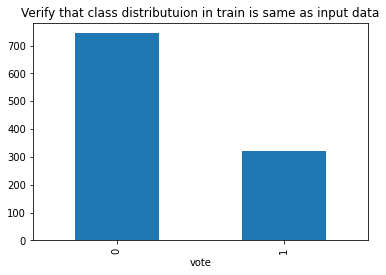

In [1791]:
train.pivot_table(index='vote', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in train is same as input data')


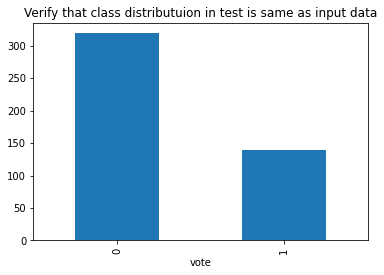

In [1792]:
test.pivot_table(index='vote', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in test is same as input data')


In [1793]:

# from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(x,y)

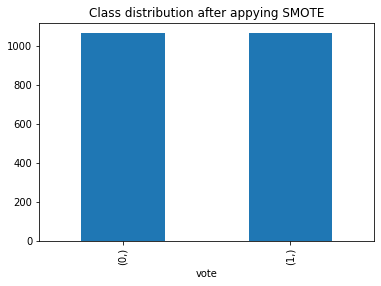

In [1794]:
(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='vote')


In [1795]:
(y_resampled).value_counts()

vote
0       1063
1       1063
dtype: int64

In [1796]:
X_resampled

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.711973,2,2,3,0,1,2,-0.937059
1,-1.157661,3,3,3,3,4,2,1.067169
2,-1.221331,3,3,4,1,2,2,1.067169
3,-1.921698,3,1,1,0,3,0,-0.937059
4,-0.839313,1,1,0,0,5,2,1.067169
...,...,...,...,...,...,...,...,...
2121,-0.217179,2,1,3,3,6,0,-0.937059
2122,0.862850,1,1,0,3,4,2,-0.937059
2123,-0.085482,2,1,3,1,1,2,0.367564
2124,1.179348,2,2,1,3,10,2,-0.937059


## LOGISTIC Regression

In [1797]:
from sklearn.linear_model import LogisticRegression

In [1798]:
df_z

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0,-0.711973,2,2,3,0,1,2,-0.937059
1,0,-1.157661,3,3,3,3,4,2,1.067169
2,0,-1.221331,3,3,4,1,2,2,1.067169
3,0,-1.921698,3,1,1,0,3,0,-0.937059
4,0,-0.839313,1,1,0,0,5,2,1.067169
...,...,...,...,...,...,...,...,...,...
1520,1,0.816100,4,2,1,3,10,3,1.067169
1521,1,1.198118,1,1,3,3,7,2,1.067169
1522,0,-1.093992,2,2,4,3,1,2,1.067169
1523,1,0.434081,2,2,0,3,10,2,1.067169


In [1799]:
array = df_z.values
x = array[:,1:8]
y = array[:,0]



In [1800]:
df_z

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0,-0.711973,2,2,3,0,1,2,-0.937059
1,0,-1.157661,3,3,3,3,4,2,1.067169
2,0,-1.221331,3,3,4,1,2,2,1.067169
3,0,-1.921698,3,1,1,0,3,0,-0.937059
4,0,-0.839313,1,1,0,0,5,2,1.067169
...,...,...,...,...,...,...,...,...,...
1520,1,0.816100,4,2,1,3,10,3,1.067169
1521,1,1.198118,1,1,3,3,7,2,1.067169
1522,0,-1.093992,2,2,4,3,1,2,1.067169
1523,1,0.434081,2,2,0,3,10,2,1.067169


## Logistic Regression

In [1801]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y1_predict = model.predict(X_train)

**Classfication Report of Training data**

In [1802]:
print('Classification Report of train data :\n',metrics.classification_report(y_train, y1_predict))

Classification Report of train data :
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       743
         1.0       0.76      0.66      0.71       324

    accuracy                           0.83      1067
   macro avg       0.81      0.78      0.80      1067
weighted avg       0.83      0.83      0.83      1067



 **Confusion Matrix of Training data**

In [1803]:

model_score = model.score(X_train, y_train)
print('Model score of training data is :',model_score)
print('Confusion matrix of training data:\n',metrics.confusion_matrix(y_train, y1_predict))


Model score of training data is : 0.8341143392689785
Confusion matrix of training data:
 [[677  66]
 [111 213]]


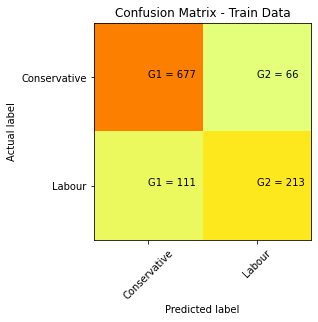

In [1804]:
y1_predict = model.predict(X_train)
cm = metrics.confusion_matrix(y_train, y1_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

**Classification Report of Testing data**

In [1805]:
print('Classification Report of test data :\n',metrics.classification_report(y_test, y_predict))

Classification Report of test data :
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       320
         1.0       0.76      0.69      0.72       138

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458



**Confusion matrix of Testing data**

In [1806]:
print('Model score of training data is :',model.score(X_test,y_test))
print('Confusion matrix of testing data:\n',metrics.confusion_matrix(y_test, y_predict))


Model score of training data is : 0.8406113537117904
Confusion matrix of testing data:
 [[290  30]
 [ 43  95]]


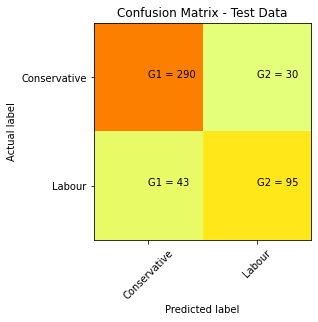

In [1807]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [1808]:
(290 + 95) / (290 + 95+30+43) 

0.8406113537117904

In [1809]:
290 / (290 + 43) 

0.8708708708708709

In [1810]:
290 / (290 + 30) 

0.90625

## After SMOTE()

In [1811]:
x=df_z.drop('vote',axis=1)
y=df[['vote']]
train, test = train_test_split(df_z, test_size = 0.3, stratify=df_z['vote'])

log_reg2 = LogisticRegression()

log_reg2=log_reg2.fit(X_resampled, y_resampled)

# x.columns
preds2 = log_reg2.predict(test[x.columns])
metrics.confusion_matrix(test['vote'], preds2)

print('Classification Report of test data:\n',metrics.classification_report(test['vote'], preds2))

Classification Report of test data:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       319
           1       0.66      0.76      0.71       139

    accuracy                           0.81       458
   macro avg       0.77      0.80      0.78       458
weighted avg       0.82      0.81      0.81       458



In [1812]:
print('Confusion Matrix of test Data:\n',metrics.confusion_matrix(y_test,preds2 ))

Confusion Matrix of test Data:
 [[205 115]
 [ 92  46]]


In [1813]:
X_train,X_test, y_train,y_test = train_test_split(X_resampled, y_resampled,test_size=0.3,random_state=101)
lof_reg3 = log_reg2.fit(X_train,y_train)

preds2 = log_reg2.predict(X_test)
predict = log_reg2.predict(X_train)
metrics.confusion_matrix(y_test, preds2)

print('Classification Report of :\n',metrics.classification_report(y_test,preds2 ))

Classification Report of :
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       332
           1       0.83      0.82      0.82       306

    accuracy                           0.83       638
   macro avg       0.83      0.83      0.83       638
weighted avg       0.83      0.83      0.83       638



In [1814]:
print('Classification Report of :\n',metrics.classification_report(y_train,predict ))

Classification Report of :
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       731
           1       0.83      0.84      0.84       757

    accuracy                           0.83      1488
   macro avg       0.83      0.83      0.83      1488
weighted avg       0.83      0.83      0.83      1488



In [1815]:
log_reg2.score(X_test,y_test)

0.829153605015674

In [1816]:
log_reg2.score(X_train,y_train)

0.8326612903225806

Confusion Matrix for testing data after balancing the data using SMOTE

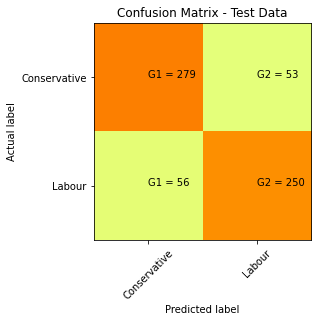

In [1817]:
cm = metrics.confusion_matrix(y_test, preds2)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [1818]:
(278 + 261) / (278 + 261+54+45)

0.8448275862068966

In [1819]:
278 / (278 + 45) 

0.8606811145510835

In [1820]:
278 / (278 + 54) 

0.8373493975903614

AUC for the Training Data: 0.833
AUC for the Test Data: 0.829


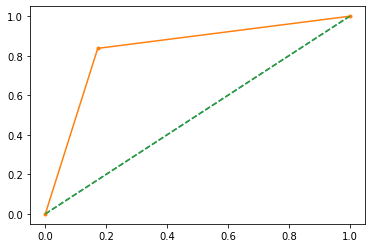

In [1821]:
preds2 = log_reg2.predict(X_test)
predict = log_reg2.predict(X_train)
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,predict)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,preds2)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,preds2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

## Linear Discriminate Analysis

In [1822]:
x1 = df_z.drop('vote',axis=1)

In [1823]:
y1 = df_z[['vote']]

In [1824]:
X1_train,X1_test, y1_train,y1_test = train_test_split(x1,y1,test_size=0.3,random_state=101)

In [1825]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X1_train,y1_train)

**Coefficients and Feature importance**

In [1826]:
clf.intercept_

array([-2.27576765])

In [1827]:
clf.coef_

array([[ 0.37888462, -0.31244946, -0.06743946, -0.83196752,  0.93378294,
         0.21989436,  0.47988698,  0.03232032]])

In [1828]:
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, clf.coef_[0][idx]))

The coefficient for age is 0.37888462494031894
The coefficient for economic.cond.national is -0.3124494573016808
The coefficient for economic.cond.household is -0.06743945756674802
The coefficient for Blair is -0.83196751553409
The coefficient for Hague is 0.9337829383984152
The coefficient for Europe is 0.21989436112846772
The coefficient for political.knowledge is 0.47988697849329776
The coefficient for gender_male is 0.032320324153964165


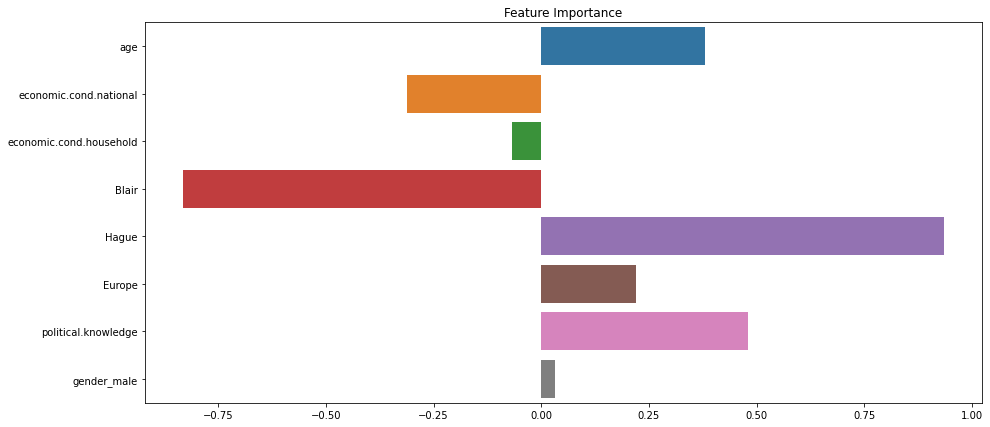

In [1829]:
plt.figure(figsize=(15,7))
for i in range(len(model1.coef_)):
    abs(model1.coef_[i])
    sns.barplot(x=model1.coef_[i],y=X1_train.columns)
    plt.title('Feature Importance')

**Confusion matric of test and train data**

In [1830]:
pred_class_train = model1.predict(X1_train)
pred_class_test = model1.predict(X1_test)

In [1831]:
metrics.confusion_matrix(y1_test,pred_class_test)

array([[289,  31],
       [ 42,  96]])

CONFUSION MATRIX:


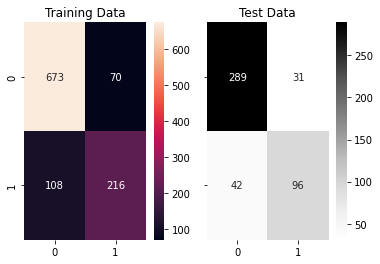

In [1832]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
print('CONFUSION MATRIX:')

plot_0 = sns.heatmap((metrics.confusion_matrix(y1_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y1_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

**Classification Report of the training data**

In [1833]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y1_train,pred_class_train),'\n')


Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.86      0.91      0.88       743
           1       0.76      0.67      0.71       324

    accuracy                           0.83      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.83      0.83      1067
 



**Classification report of the test**

In [1834]:
print('Classification Report of the test data:\n\n',metrics.classification_report(y1_test,pred_class_test),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.87      0.90      0.89       320
           1       0.76      0.70      0.72       138

    accuracy                           0.84       458
   macro avg       0.81      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458
 



AUC for the Training Data: 0.786
AUC for the Test Data: 0.799


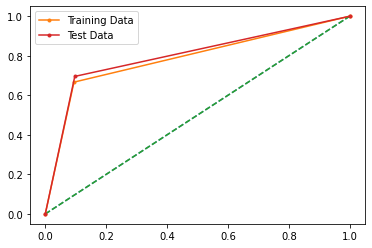

In [1835]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y1_train,pred_class_train)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y1_train,pred_class_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y1_test,pred_class_test)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y1_test,pred_class_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

After SMOTE

In [1836]:

clf2 = LinearDiscriminantAnalysis()
X1_train,X1_test, y1_train,y1_test = train_test_split(X_resampled, y_resampled,test_size=0.3,random_state=101)
model1=clf2.fit(X1_train,y1_train)

In [1837]:
clf2.intercept_

array([-0.63948327])

In [1838]:
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, clf2.coef_[0][idx]))

The coefficient for age is 0.4279566079188144
The coefficient for economic.cond.national is -0.5373167849493541
The coefficient for economic.cond.household is -0.2443573150757467
The coefficient for Blair is -0.7808373490434124
The coefficient for Hague is 0.9578629848872114
The coefficient for Europe is 0.2030280708780018
The coefficient for political.knowledge is 0.42299621808862065
The coefficient for gender_male is -0.06406481214848449


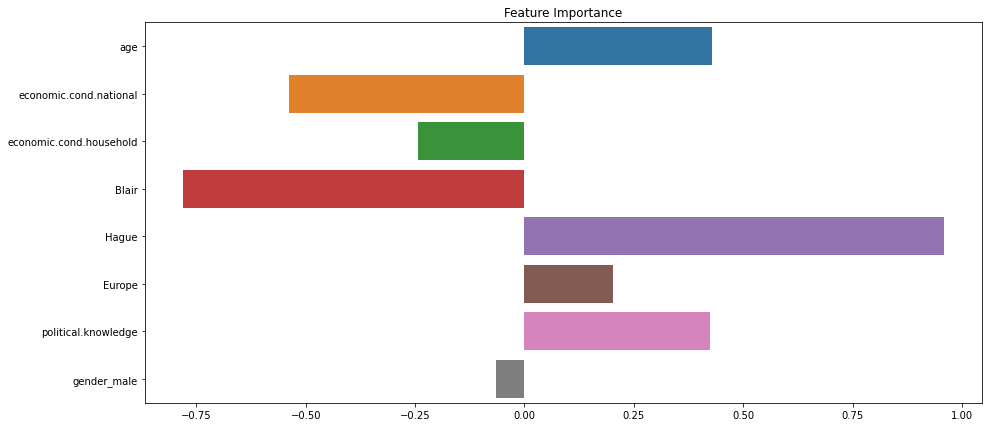

In [1839]:
plt.figure(figsize=(15,7))
for i in range(len(model1.coef_)):
    abs(model1.coef_[i])
    sns.barplot(x=model1.coef_[i],y=X1_train.columns)
    plt.title('Feature Importance')

In [1840]:
pred_class_train = model1.predict(X1_train)
pred_class_test = model1.predict(X1_test)

CONFUSION MATRIX:


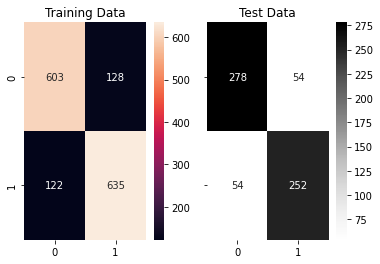

In [1841]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
print('CONFUSION MATRIX:')

plot_0 = sns.heatmap((metrics.confusion_matrix(y1_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y1_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [1842]:
(278 + 260) / (278 + 261+54+46) 

0.8419405320813772

In [1843]:
metrics.confusion_matrix(y1_test,pred_class_test)

array([[278,  54],
       [ 54, 252]])

In [1844]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y1_train,pred_class_train),'\n')


Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.83      0.82      0.83       731
           1       0.83      0.84      0.84       757

    accuracy                           0.83      1488
   macro avg       0.83      0.83      0.83      1488
weighted avg       0.83      0.83      0.83      1488
 



In [1845]:
print('Classification Report of the test data:\n\n',metrics.classification_report(y1_test,pred_class_test),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.84      0.84      0.84       332
           1       0.82      0.82      0.82       306

    accuracy                           0.83       638
   macro avg       0.83      0.83      0.83       638
weighted avg       0.83      0.83      0.83       638
 



In [1846]:
pred_class_train = model1.predict(X1_train)
pred_class_test = model1.predict(X1_test)
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y1_train,pred_class_train)
print('AUC for the Training Data: %.3f' % auc)



AUC for the Training Data: 0.832


**AUC and ROC**

In [1847]:
pred_prob_train = model1.predict_proba(X1_train)
pred_prob_test = model1.predict_proba(X1_test)

AUC for the Training Data: 0.832
AUC for the Test Data: 0.830


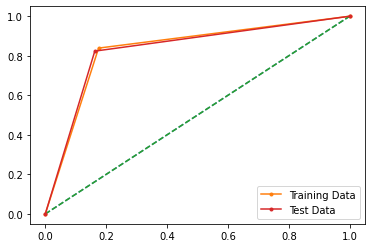

In [1848]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y1_train,pred_class_train)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y1_train,pred_class_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y1_test,pred_class_test)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y1_test,pred_class_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [1849]:
model1.score(X1_train,y1_train)

0.831989247311828

In [1850]:
model1.score(X1_test,y1_test)

0.8307210031347962

In [1851]:
print('vote = ')
for i in range(len(X1_train.columns)):
    print('{} x {} +'.format(round(clf2.coef_[0][i],2),X1_train.columns[i]),end=" ")

vote = 
0.43 x age + -0.54 x economic.cond.national + -0.24 x economic.cond.household + -0.78 x Blair + 0.96 x Hague + 0.2 x Europe + 0.42 x political.knowledge + -0.06 x gender_male + 

1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

## KNN - KNeighborsClassifier

In [1852]:
from sklearn.neighbors import KNeighborsClassifier

In [1853]:
df_x = df_z.drop('vote',axis=1)
df_y = df_z[['vote']]
x=np.array(df_x)
y=np.array(df_y)

In [1854]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [1855]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [1856]:
NNH.fit(X2_train, y2_train)

KNeighborsClassifier(weights='distance')

In [1857]:
predicted_testlabels = NNH.predict(X2_test)
predicted_trainlabels = NNH.predict(X2_train)
NNH.score(X2_test, y2_test)


0.7991266375545851

In [1858]:
NNH.score(X2_train,y2_train)

0.9990627928772259

In [1859]:
print(metrics.confusion_matrix(y2_test, predicted_testlabels))

[[278  50]
 [ 42  88]]


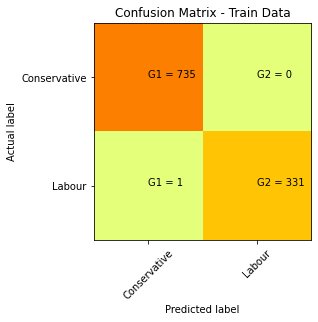

In [1860]:
cm = metrics.confusion_matrix(y2_train, predicted_trainlabels)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

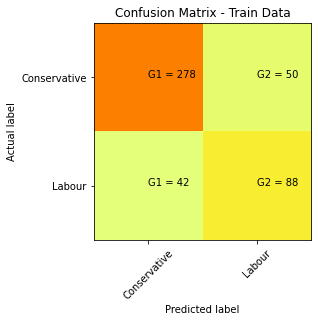

In [1861]:
cm = metrics.confusion_matrix(y2_test, predicted_testlabels)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [1862]:
np.sqrt(1525)

39.05124837953327

In [1863]:
NNH2 = KNeighborsClassifier(n_neighbors= 39 , weights = 'distance' )

In [1864]:
NNH2.fit(X2_train, y2_train)

KNeighborsClassifier(n_neighbors=39, weights='distance')

In [1865]:
predicted_testlabels = NNH2.predict(X2_test)
predicted_trainlabels = NNH2.predict(X2_train)
NNH2.score(X2_test, y2_test)


0.8275109170305677

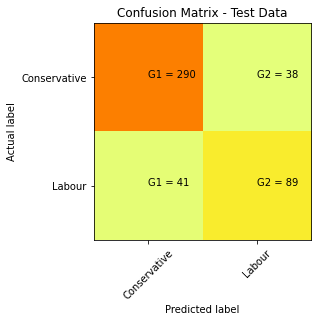

In [1866]:
cm = metrics.confusion_matrix(y2_test, predicted_testlabels)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [1867]:
NNH3 = KNeighborsClassifier(n_neighbors= 40 , weights = 'distance' )
NNH3.fit(X2_train, y2_train)
predicted_testlabels = NNH3.predict(X2_test)
predicted_trainlabels = NNH3.predict(X2_train)
NNH3.score(X2_test, y2_test)


0.8253275109170306

In [1868]:
List = []
for i in range(2,50):
  NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance' )
  NNH.fit(X2_train, y2_train)
  score = NNH.score(X2_test, y2_test)
  List.append(score)
  

Text(0, 0.5, 'Score')

<Figure size 720x1080 with 0 Axes>

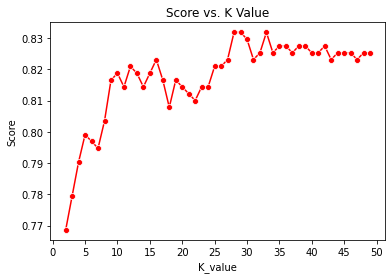

In [1869]:
plt.figure(figsize=(10,15))
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0,60,5))
sns.lineplot(range(2, 50), List,marker='o',color='red')
plt.title('Score vs. K Value')
plt.xlabel('K_value')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

<Figure size 720x1080 with 0 Axes>

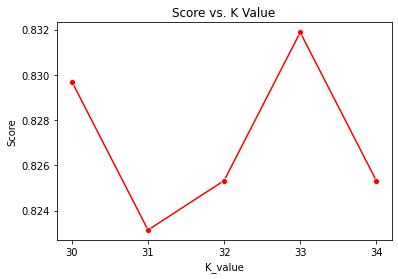

In [1870]:
List = []
for i in range(30,35):
  NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance' )
  NNH.fit(X2_train, y2_train)
  score = NNH.score(X2_test, y2_test)
  List.append(score)

plt.figure(figsize=(10,15))
fig, ax = plt.subplots()
ax.set_xticks(np.arange(30,35))
sns.lineplot(range(30, 35), List,marker='o',color='red')
plt.title('Score vs. K Value')
plt.xlabel('K_value')
plt.ylabel('Score')


The highest peak at 33.
so consider k=33

In [1871]:
NNH3 = KNeighborsClassifier(n_neighbors= 33 , weights = 'distance' )
NNH3.fit(X2_train, y2_train)
predicted_testlabels = NNH3.predict(X2_test)
predicted_trainlabels = NNH3.predict(X2_train)
NNH3.score(X2_test, y2_test)

0.8318777292576419

**Confusion Matrix for Test Data**

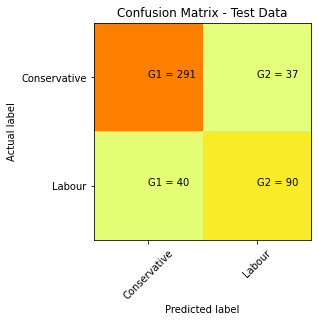

In [1872]:
cm = metrics.confusion_matrix(y2_test, predicted_testlabels)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [1873]:
np.sqrt(2126)

46.10856753359401

**After SMOTE for KNeighborsClassification** 

Text(0, 0.5, 'Score')

<Figure size 720x1080 with 0 Axes>

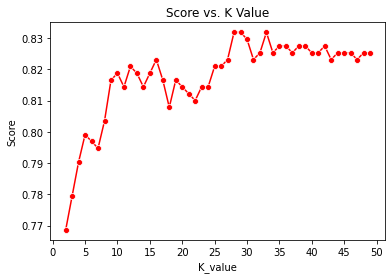

In [1874]:
List = []
for i in range(2,50):
  NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance' )
  NNH.fit(X2_train, y2_train)
  score = NNH.score(X2_test, y2_test)
  List.append(score)


plt.figure(figsize=(10,15))
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0,60,5))
sns.lineplot(range(2, 50), List,marker='o',color='red')
plt.title('Score vs. K Value')
plt.xlabel('K_value')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

<Figure size 720x1080 with 0 Axes>

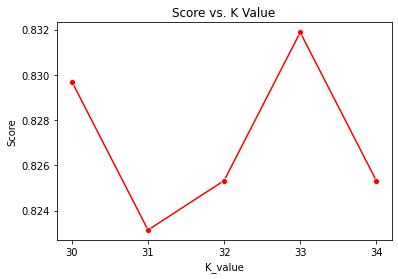

In [1875]:
List = []
for i in range(30,35):
  NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance' )
  NNH.fit(X2_train, y2_train)
  score = NNH.score(X2_test, y2_test)
  List.append(score)

plt.figure(figsize=(10,15))
fig, ax = plt.subplots()
ax.set_xticks(np.arange(30,35))
sns.lineplot(range(30, 35), List,marker='o',color='red')
plt.title('Score vs. K Value')
plt.xlabel('K_value')
plt.ylabel('Score')


In [1876]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=1)
NNH3 = KNeighborsClassifier(n_neighbors= 33 , weights = 'distance' )
NNH3.fit(X2_train, y2_train)
predicted_testlabels = NNH3.predict(X2_test)
predicted_trainlabels = NNH3.predict(X2_train)
NNH3.score(X2_test, y2_test)

0.8495297805642633

In [1877]:
print(metrics.classification_report(y2_train,predicted_trainlabels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       738
           1       1.00      1.00      1.00       750

    accuracy                           1.00      1488
   macro avg       1.00      1.00      1.00      1488
weighted avg       1.00      1.00      1.00      1488



In [1878]:
print(metrics.classification_report(y2_test,predicted_testlabels))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       325
           1       0.82      0.89      0.85       313

    accuracy                           0.85       638
   macro avg       0.85      0.85      0.85       638
weighted avg       0.85      0.85      0.85       638



**Confusion Matrix for Train Data**

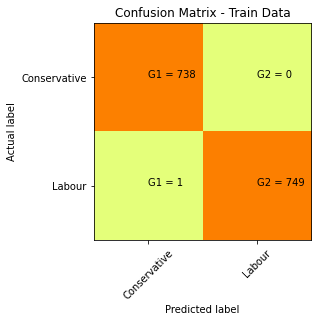

In [1879]:
cm = metrics.confusion_matrix(y2_train, predicted_trainlabels)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [1880]:
(272 + 263) / (272 + 263+62+41) 

0.8385579937304075

In [1881]:
278 / (278 + 46) 

0.8580246913580247

In [1882]:
278 / (278 + 54) 

0.8373493975903614

**Confusion Matrix for Test Data**

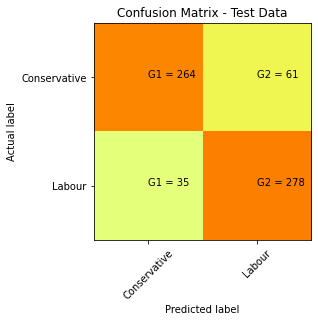

In [1883]:
cm = metrics.confusion_matrix(y2_test, predicted_testlabels)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

AUC for the Training Data: 0.999
AUC for the Test Data: 0.850


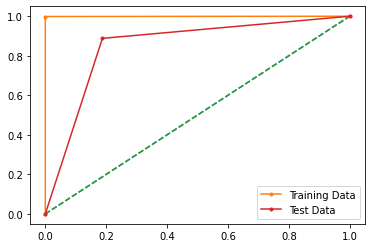

In [1884]:
predicted_testlabels = NNH3.predict(X2_test)
predicted_trainlabels = NNH3.predict(X2_train)

# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y2_train,predicted_trainlabels)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y2_train,predicted_trainlabels)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y2_test,predicted_testlabels)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y2_test,predicted_testlabels)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


## Naïve Bayes Model

In [1885]:
df_x = df_z.drop('vote',axis=1)
df_y = df_z[['vote']]
x=np.array(df_x)
y=np.array(df_y)

In [1886]:
X3_train, X3_test, y3_train, y3_test = train_test_split(x, y, test_size=0.30, random_state=1)

**Classification Report for Test Data**

In [1887]:
model4 = GaussianNB()
model4.fit(X3_train, y3_train)
predict = model4.predict(X3_test)
print(metrics.classification_report(y3_test,predict))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       328
           1       0.68      0.72      0.70       130

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



**Confusion Matrix for Testing data**

In [1888]:
print(metrics.confusion_matrix(y3_test, predict))

[[284  44]
 [ 36  94]]


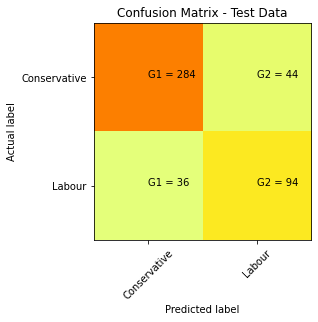

In [1889]:
cm = metrics.confusion_matrix(y3_test, predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [1890]:
model4.score(X3_test,y3_test)

0.8253275109170306

**After SMOTE**

In [1891]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=1)

**Classification Report for test data**

In [1892]:
model4 = GaussianNB()
model4.fit(X3_train, y3_train)
predict = model4.predict(X3_test)
print(metrics.classification_report(y3_test,predict))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       325
           1       0.81      0.81      0.81       313

    accuracy                           0.82       638
   macro avg       0.82      0.81      0.81       638
weighted avg       0.82      0.82      0.82       638



In [1893]:
predict1 = model4.predict(X3_train)
print(metrics.classification_report(y3_train,predict1))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       738
           1       0.83      0.83      0.83       750

    accuracy                           0.83      1488
   macro avg       0.83      0.83      0.83      1488
weighted avg       0.83      0.83      0.83      1488



In [1894]:
print(metrics.confusion_matrix(y3_test, predict))

[[267  58]
 [ 60 253]]


**Confusion Matrix for Test Data**

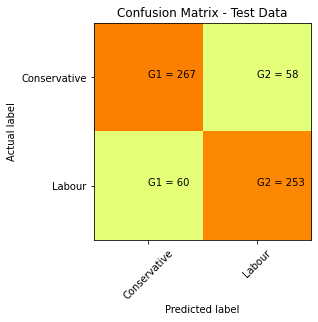

In [1895]:
cm = metrics.confusion_matrix(y3_test, predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [1896]:
model4.score(X3_test,y3_test)

0.8150470219435737

In [1897]:
(249 + 263) / (249 + 263+62+64) 

0.8025078369905956

In [1898]:
249 / (249 + 64) 

0.7955271565495208

In [1899]:
249 / (249 + 62) 

0.8006430868167203

AUC for the Training Data: 0.828
AUC for the Test Data: 0.815


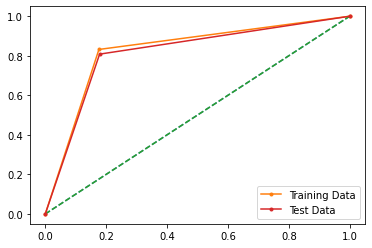

In [1900]:
predict1 = model4.predict(X3_train)
predict = model4.predict(X3_test)
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y3_train,predict1)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y3_train,predict1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y3_test,predict)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y3_test,predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Model Tunning

Model tuning is the experimental process of finding the optimal values of hyperparameters to maximize model performance. Hyperparameters are the set of variables whose values cannot be estimated by the model from the training data. These values control the training process

In [1901]:
x = df_z.drop('vote',axis=1)
y = df_z[['vote']]

X4_train, X4_test, y4_train, y4_test = train_test_split(x, y, test_size=0.30, random_state=1)
random_forest = RandomForestClassifier(random_state=1).fit(X4_train, y4_train)
random_forest.fit(X4_train, y4_train)

RandomForestClassifier(random_state=1)

In [1902]:
random_forest = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=2).fit(X4_train, y4_train)
random_forest.fit(X4_train, y4_train)
print(random_forest.score(X4_test, y4_test))

0.8187772925764192


In [1903]:
predictrf = random_forest.predict(X4_test)

print(metrics.confusion_matrix(y4_test, predictrf))


[[286  42]
 [ 41  89]]


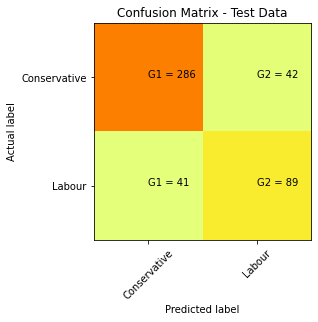

In [1904]:
cm = metrics.confusion_matrix(y4_test,predictrf )
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [1905]:
print('Classification Report:\n',metrics.classification_report(y4_test,predictrf))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       328
           1       0.68      0.68      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [1906]:
predictrf1 = random_forest.predict(X4_train)
print('Classification Report:\n',metrics.classification_report(y4_train,predictrf1))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       735
           1       0.99      1.00      1.00       332

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



**After SMOTE for Random Forest Classification model**

In [1907]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=1)
random_forest = RandomForestClassifier(random_state=1).fit(X4_train, y4_train)
random_forest.fit(X4_train, y4_train)

RandomForestClassifier(random_state=1)

In [1908]:
random_forest = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=2).fit(X4_train, y4_train)
random_forest.fit(X4_train, y4_train)
print(random_forest.score(X4_test, y4_test))

0.8699059561128527


In [1909]:
predictrf = random_forest.predict(X4_test)
print(metrics.confusion_matrix(y4_test, predictrf))


[[283  42]
 [ 41 272]]


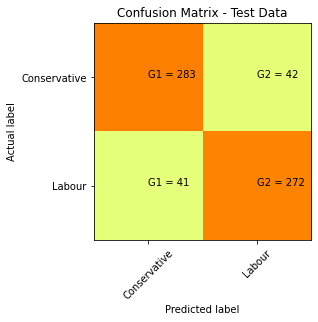

In [1910]:
cm = metrics.confusion_matrix(y4_test,predictrf )
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [1911]:
(278 + 276) / (278 + 276+37+47) 

0.8683385579937304

In [1912]:
276/ (276 + 37) 

0.8817891373801917

In [1913]:
276 / (276 + 47) 

0.8544891640866873

AUC for the Training Data: 0.828
AUC for the Test Data: 0.815


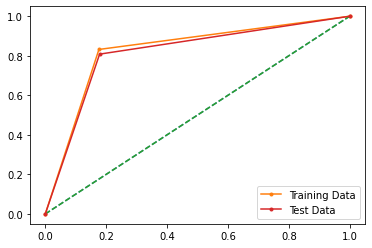

In [1914]:
predict1 = model4.predict(X4_train)
predict = model4.predict(X4_test)
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y4_train,predict1)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y4_train,predict1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y4_test,predict)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y4_test,predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**Classification report of Testing data for Random Forest Classification model** 

In [1915]:
print('Classification Report:\n',metrics.classification_report(y4_test,predictrf))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       325
           1       0.87      0.87      0.87       313

    accuracy                           0.87       638
   macro avg       0.87      0.87      0.87       638
weighted avg       0.87      0.87      0.87       638



1.6 Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

## Decision Tree

In [1916]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X_resampled, y_resampled, test_size=.30, random_state=1)

In [1917]:
decision_Tree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
decision_Tree.fit(X5_train, y5_train)

DecisionTreeClassifier(random_state=1)

In [1918]:
print(decision_Tree.score(X5_train, y5_train))
print(decision_Tree.score(X5_test, y5_test))



0.9993279569892473
0.8150470219435737


In [1919]:
train_char_label = ['No', 'Yes']
election_Tree_File = open('election_tree.dot','w')
dot_data = tree.export_graphviz(decision_Tree, out_file=election_Tree_File, feature_names = list(X5_train), class_names = list(train_char_label))
election_Tree_File.close()

In [1920]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X5_train, y5_train)
print(dTreeR.score(X5_train, y5_train))
print(dTreeR.score(X5_test, y5_test))

0.7997311827956989
0.8056426332288401


In [1921]:
train_char_label = ['No', 'Yes']
election_Tree_FileR = open('election_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=election_Tree_FileR, feature_names = list(X5_train), class_names = list(train_char_label))
election_Tree_FileR.close()

In [1922]:
dTreeR1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, random_state=1)
dTreeR1.fit(X5_train, y5_train)
print(dTreeR1.score(X5_train, y5_train))
print(dTreeR1.score(X5_test, y5_test))

0.875
0.8150470219435737


In [1923]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X5_train.columns))

                              Imp
age                      0.000000
economic.cond.national   0.058907
economic.cond.household  0.000000
Blair                    0.252457
Hague                    0.571524
Europe                   0.093379
political.knowledge      0.023733
gender_male              0.000000


In [1924]:
dTreeR.feature_importances_

array([0.        , 0.05890699, 0.        , 0.25245678, 0.5715237 ,
       0.09337908, 0.02373346, 0.        ])

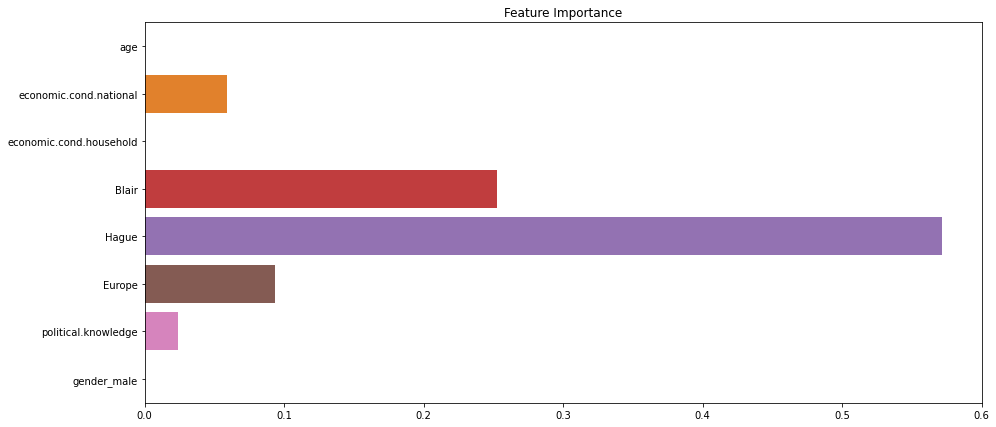

In [1925]:
plt.figure(figsize=(15,7))
for i in range(len(dTreeR.feature_importances_)):
    abs(dTreeR.feature_importances_[i])
    sns.barplot(x=dTreeR.feature_importances_,y=X5_train.columns)
    plt.title('Feature Importance')

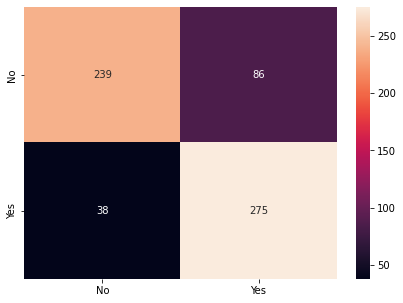

In [1926]:
y_predict = dTreeR.predict(X5_test)

cm=metrics.confusion_matrix(y5_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [1927]:
print(dTreeR.score(X5_test , y5_test))

0.8056426332288401


## Bagging

In [1928]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=decision_Tree, n_estimators=50,random_state=1)
# bagging = BaggingClassifier(n_estimators=50,random_state=1)

bag = bagging.fit(X5_train, y5_train)


In [1929]:
print(bagging.score(X5_test , y5_test))

0.8605015673981191


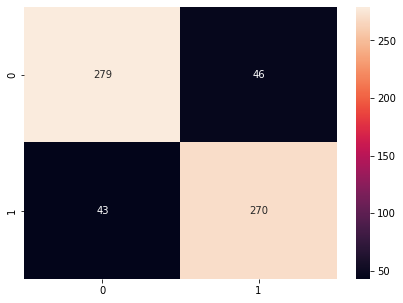

In [1930]:
y_predict = bagging.predict(X5_test)

cm=metrics.confusion_matrix(y5_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["0","1"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [1931]:
276 / (276 + 47) 

0.8544891640866873

In [1932]:
print(metrics.classification_report(y5_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       325
           1       0.85      0.86      0.86       313

    accuracy                           0.86       638
   macro avg       0.86      0.86      0.86       638
weighted avg       0.86      0.86      0.86       638



In [1933]:
predicted_trainlabels = bagging.predict(X5_train)
predicted_testlabels = bagging.predict(X5_test)
auc = metrics.roc_auc_score(y5_train,predicted_trainlabels)
print('AUC for the Training Data: %.3f' % auc)

auc = metrics.roc_auc_score(y5_test,predicted_testlabels)
print('AUC for the Training Data: %.3f' % auc)


AUC for the Training Data: 0.998
AUC for the Training Data: 0.861


## Boosting

In [1934]:
from sklearn.ensemble import AdaBoostClassifier
boosting = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
boosting = boosting.fit(X5_train, y5_train)


In [1935]:
print(boosting.score(X5_test , y5_test))

0.8244514106583072


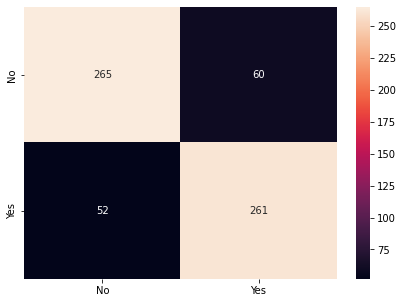

In [1936]:
y_predict = boosting.predict(X5_test)


cm=metrics.confusion_matrix(y5_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [1937]:
print(metrics.classification_report(y5_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       325
           1       0.81      0.83      0.82       313

    accuracy                           0.82       638
   macro avg       0.82      0.82      0.82       638
weighted avg       0.82      0.82      0.82       638



In [1938]:
(261 + 259) / (261 + 259+54+64) 

0.8150470219435737

In [1939]:
261/ (261 + 54) 

0.8285714285714286

In [1940]:
261/ (261 + 64) 

0.803076923076923

In [1941]:
predicted_trainlabels = boosting.predict(X5_train)
predicted_testlabels = boosting.predict(X5_test)
auc = metrics.roc_auc_score(y5_train,predicted_trainlabels)
print('AUC for the Training Data: %.3f' % auc)

auc = metrics.roc_auc_score(y5_test,predicted_testlabels)
print('AUC for the Training Data: %.3f' % auc)

AUC for the Training Data: 0.829
AUC for the Training Data: 0.825


## Comparision for all the models

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)


**Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score**

Logical Regression:



Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)

2.1 Find the number of characters, words, and sentences for the mentioned documents. – 3 Marks

2.2 Remove all the stopwords from all three speeches. – 3 Marks

2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks

2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]

In [1942]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
import json
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1943]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [1944]:
nixon = inaugural.words('1973-Nixon.txt')
kennedy = inaugural.words('1961-Kennedy.txt')
roosevelt = inaugural.words('1941-Roosevelt.txt')

Nixon = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Roosevelt = inaugural.raw('1973-Nixon.txt')

In [1945]:
print(nixon)
print(kennedy)
print(roosevelt)

['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]
['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]
['On', 'each', 'national', 'day', 'of', 'inauguration', ...]


2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [1946]:
list1 = ['1973-Nixon.txt','1961-Kennedy.txt','1941-Roosevelt.txt']
for i in list1:
  num_chars = len(inaugural.raw(i))
  num_words = len(inaugural.words(i))
  num_sents = len(inaugural.sents(i))
  num_vocab = len(set(w.lower() for w in inaugural.words(i)))

  print('The {} file has :\n The number od characters : {}\n The number of words : {}\n The number of sentences : {}\n The number od vocabulary : {}\n\n'.format(i,num_chars,num_words,num_sents,num_vocab))



The 1973-Nixon.txt file has :
 The number od characters : 9991
 The number of words : 2028
 The number of sentences : 69
 The number od vocabulary : 516


The 1961-Kennedy.txt file has :
 The number od characters : 7618
 The number of words : 1546
 The number of sentences : 52
 The number od vocabulary : 546


The 1941-Roosevelt.txt file has :
 The number od characters : 7571
 The number of words : 1536
 The number of sentences : 68
 The number od vocabulary : 502




2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [1947]:
stemmer = SnowballStemmer("english")

In [1948]:
stemmer

In [1949]:


from nltk.corpus import stopwords
tokens_nix = []
stop_words = set(stopwords.words("english") + list(string.punctuation) + ['--'])
tokenized_sent = [word.lower() for word in nltk.word_tokenize(Nixon)]
for w in tokenized_sent:
    if w not in stop_words:
      tokens_nix.append(w)

tokens_ken = []        
tokenized_sent = [word.lower() for word in nltk.word_tokenize(Kennedy)]
for w in tokenized_sent:
    if w not in stop_words:
      tokens_ken.append(w)

tokens_roose = []
tokenized_sent = [word.lower() for word in nltk.word_tokenize(Roosevelt)]
for w in tokenized_sent:
    if w not in stop_words:
      tokens_roose.append(w)

In [1950]:
stop_words

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',

In [1951]:
' ,'.join(stop_words)

'< ,( ,, ,we ,yourself ,because ,wouldn\'t ,` ,they ,or ,wasn ," ,below ,+ ,of ,then ,i ,further ,- ,himself ,? ,) ,from ,itself ,each ,she ,yours ,her ,to ,own ,has ,when ,any ,didn\'t ,out ,down ,that\'ll ,| ,having ,ma ,me ,his ,don\'t ,shan ,s ,about ,while ,other ,once ,needn ,this ,d ,by ,not ,mustn ,after ,again ,aren ,very ,have ,she\'s ,[ ,did ,some ,too ,you ,on ,ll ,shan\'t ,shouldn ,shouldn\'t ,will ,in ,no ,under ,weren ,herself ,~ ,my ,} ,just ,over ,aren\'t ,couldn\'t ,hadn\'t ,hasn ,the ,don ,hasn\'t ,$ ,same ,_ ,as ,-- ,* ,won ,^ ,if ,were ,m ,should\'ve ,. ,am ,against ,# ,you\'ll ,ours ,between ,ve ,that ,mightn\'t ,] ,isn\'t ,he ,such ,how ,you\'d ,until ,it\'s ,all ,wasn\'t ,both ,\' ,\\ ,was ,these ,a ,few ,mightn ,there ,weren\'t ,doing ,for ,hers ,> ,won\'t ,/ ,mustn\'t ,what ,and ,ain ,into ,is ,an ,{ ,which ,@ ,had ,only ,up ,them ,couldn ,themselves ,does ,= ,re ,your ,nor ,their ,who ,haven\'t ,wouldn ,been ,off ,theirs ,being ,doesn\'t ,now ,& ,those ,% ,ne

In [1952]:
print('The word count before removing the stopwords is ',len(inaugural.words('1961-Kennedy.txt')))
print('\nThe word cound of the Kennedy file after removing stopwords : ',len(tokens_ken))
print('\nThe file after the removal of stopwords and puntuations:\n',)
'  '.join(tokens_ken)

The word count before removing the stopwords is  1546

The word cound of the Kennedy file after removing stopwords :  696

The file after the removal of stopwords and puntuations:



"vice  president  johnson  mr.  speaker  mr.  chief  justice  president  eisenhower  vice  president  nixon  president  truman  reverend  clergy  fellow  citizens  observe  today  victory  party  celebration  freedom  symbolizing  end  well  beginning  signifying  renewal  well  change  sworn  almighty  god  solemn  oath  forebears  l  prescribed  nearly  century  three  quarters  ago  world  different  man  holds  mortal  hands  power  abolish  forms  human  poverty  forms  human  life  yet  revolutionary  beliefs  forebears  fought  still  issue  around  globe  belief  rights  man  come  generosity  state  hand  god  dare  forget  today  heirs  first  revolution  let  word  go  forth  time  place  friend  foe  alike  torch  passed  new  generation  americans  born  century  tempered  war  disciplined  hard  bitter  peace  proud  ancient  heritage  unwilling  witness  permit  slow  undoing  human  rights  nation  always  committed  committed  today  home  around  world  let  every  na

In [1953]:
print('The word count before removing the stopwords is ',len(inaugural.words('1973-Nixon.txt')))
print('\nThe word cound of the Nixon file after removing stopwords : ',len(tokens_nix))
print('\nThe file after the removal of stopwords and puntuations:\n',)
'  '.join(tokens_nix)

The word count before removing the stopwords is  2028

The word cound of the Nixon file after removing stopwords :  632

The file after the removal of stopwords and puntuations:



"national  day  inauguration  since  1789  people  renewed  sense  dedication  united  states  washington  's  day  task  people  create  weld  together  nation  lincoln  's  day  task  people  preserve  nation  disruption  within  day  task  people  save  nation  institutions  disruption  without  us  come  time  midst  swift  happenings  pause  moment  take  stock  recall  place  history  rediscover  may  risk  real  peril  inaction  lives  nations  determined  count  years  lifetime  human  spirit  life  man  three-score  years  ten  little  little  less  life  nation  fullness  measure  live  men  doubt  men  believe  democracy  form  government  frame  life  limited  measured  kind  mystical  artificial  fate  unexplained  reason  tyranny  slavery  become  surging  wave  future  freedom  ebbing  tide  americans  know  true  eight  years  ago  life  republic  seemed  frozen  fatalistic  terror  proved  true  midst  shock  acted  acted  quickly  boldly  decisively  later  years  liv

In [1954]:
print('The word count before removing the stopwords is ',len(inaugural.words('1941-Roosevelt.txt')))
print('\nThe word cound of the Roosevelet file after removing stopwords : ',len(tokens_roose))
print('\nThe file after the removal of stopwords and puntuations:\n',)
'  '.join(tokens_roose)

The word count before removing the stopwords is  1536

The word cound of the Roosevelet file after removing stopwords :  848

The file after the removal of stopwords and puntuations:



"mr.  vice  president  mr.  speaker  mr.  chief  justice  senator  cook  mrs.  eisenhower  fellow  citizens  great  good  country  share  together  met  four  years  ago  america  bleak  spirit  depressed  prospect  seemingly  endless  war  abroad  destructive  conflict  home  meet  today  stand  threshold  new  era  peace  world  central  question  us  shall  use  peace  let  us  resolve  era  enter  postwar  periods  often  time  retreat  isolation  leads  stagnation  home  invites  new  danger  abroad  let  us  resolve  become  time  great  responsibilities  greatly  borne  renew  spirit  promise  america  enter  third  century  nation  past  year  saw  far-reaching  results  new  policies  peace  continuing  revitalize  traditional  friendships  missions  peking  moscow  able  establish  base  new  durable  pattern  relationships  among  nations  world  america  's  bold  initiatives  1972  long  remembered  year  greatest  progress  since  end  world  war  ii  toward  lasting  pea

2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [1955]:
tokens = []
for i in range(len(inaugural.fileids())):
  tokenized_sent = [word.lower() for word in nltk.word_tokenize(inaugural.raw(inaugural.fileids()[i]))]
  for w in tokenized_sent:
    if w not in stop_words:
      tokens.append(w)


In [1956]:
tokens

['fellow-citizens',
 'senate',
 'house',
 'representatives',
 'among',
 'vicissitudes',
 'incident',
 'life',
 'event',
 'could',
 'filled',
 'greater',
 'anxieties',
 'notification',
 'transmitted',
 'order',
 'received',
 '14th',
 'day',
 'present',
 'month',
 'one',
 'hand',
 'summoned',
 'country',
 'whose',
 'voice',
 'never',
 'hear',
 'veneration',
 'love',
 'retreat',
 'chosen',
 'fondest',
 'predilection',
 'flattering',
 'hopes',
 'immutable',
 'decision',
 'asylum',
 'declining',
 'years',
 'retreat',
 'rendered',
 'every',
 'day',
 'necessary',
 'well',
 'dear',
 'addition',
 'habit',
 'inclination',
 'frequent',
 'interruptions',
 'health',
 'gradual',
 'waste',
 'committed',
 'time',
 'hand',
 'magnitude',
 'difficulty',
 'trust',
 'voice',
 'country',
 'called',
 'sufficient',
 'awaken',
 'wisest',
 'experienced',
 'citizens',
 'distrustful',
 'scrutiny',
 'qualifications',
 'could',
 'overwhelm',
 'despondence',
 'one',
 'inheriting',
 'inferior',
 'endowments',
 'natur

In [1957]:
nltk.FreqDist(tokens)

FreqDist({'people': 594, 'government': 570, 'us': 502, 'must': 374, 'upon': 371, 'great': 346, 'may': 343, 'world': 343, 'states': 335, 'nation': 328, ...})

In [1958]:
nltk.FreqDist(tokens).most_common(3)

[('people', 594), ('government', 570), ('us', 502)]

2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

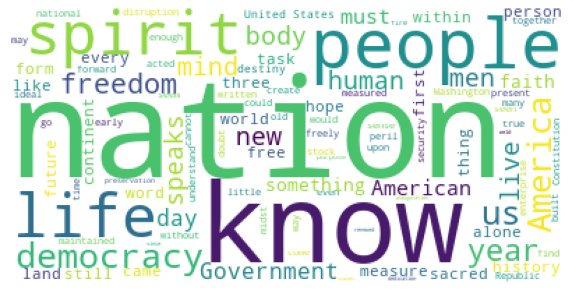

In [1959]:
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords = stop_words,background_color='white',max_words =100).generate(Nixon)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

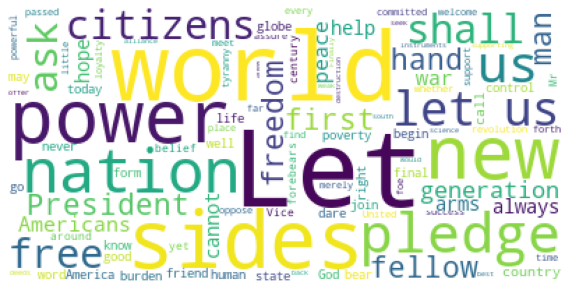

In [1960]:
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords = stop_words,background_color='white',max_words =100).generate(Kennedy)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

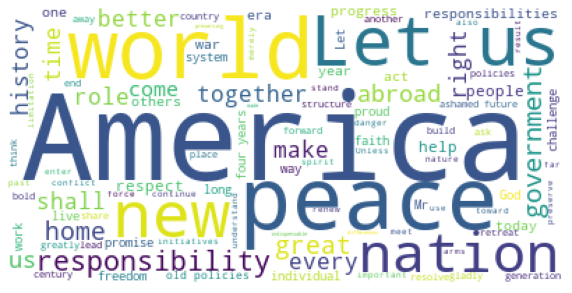

In [1961]:
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords = stop_words,background_color='white',max_words =100).generate(Roosevelt)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()